In [615]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [616]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [617]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [619]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [620]:
df.duplicated().sum()

0

In [621]:
test_data.duplicated().sum()

0

In [622]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [623]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [624]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

approx 20% of age and 80% cabin data is null so we should delete the cabin column

In [625]:
test_data.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

36% cabin data is null and (% Age

In [626]:
df['Title'] = df['Name'].str.split().str.get(1)
df['Title'].value_counts()

Title
Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: count, dtype: int64

In [627]:
"""for i in df:
    df['Title'] = df['Title'].replace('Mrs.','Married_woman')
    df['Title'] = df['Title'].replace(['Miss.','Ms.','Mme.','Mlle.'],'UN_Married')
    df['Title'] = df['Title'].replace(['Major.','Col.'],'Army')
    df['Title'] = df['Title'].replace('Master.','Young_Boy')
    df['Title'] = df['Title'].replace(['Melkebeke,','Jonkheer.','Shawah,','the','Velde,','Capt.','Messemaeker,','Carlo,','Steen,','Mulder,','Pelsmaeker,','Walle,','der','Billiard,','Don.','Cruyssen,','Impe,','Planke,'],'UNKNOWN')"""

"for i in df:\n    df['Title'] = df['Title'].replace('Mrs.','Married_woman')\n    df['Title'] = df['Title'].replace(['Miss.','Ms.','Mme.','Mlle.'],'UN_Married')\n    df['Title'] = df['Title'].replace(['Major.','Col.'],'Army')\n    df['Title'] = df['Title'].replace('Master.','Young_Boy')\n    df['Title'] = df['Title'].replace(['Melkebeke,','Jonkheer.','Shawah,','the','Velde,','Capt.','Messemaeker,','Carlo,','Steen,','Mulder,','Pelsmaeker,','Walle,','der','Billiard,','Don.','Cruyssen,','Impe,','Planke,'],'UNKNOWN')"

In [628]:
for i in df:
    df['Title'] = df['Title'].replace('Mr.',1)
    df['Title'] = df['Title'].replace('Dr.',2)
    df['Title'] = df['Title'].replace(['Mrs.','Gordon,'],6)
    df['Title'] = df['Title'].replace(['Miss.','Ms.','Mme.','Mlle.','y'],5)
    df['Title'] = df['Title'].replace(['Major.','Col.'],3)
    df['Title'] = df['Title'].replace('Master.',4)
    df['Title'] = df['Title'].replace(['Melkebeke,','Rev.','Jonkheer.','Shawah,','the','Velde,','Capt.','Messemaeker,','Carlo,','Steen,','Mulder,','Pelsmaeker,','Walle,','der','Billiard,','Don.','Cruyssen,','Impe,','Planke,'],0)

In [629]:
df['Title'].value_counts()

Title
1    502
5    187
6    123
4     40
0     28
2      7
3      4
Name: count, dtype: int64

In [630]:
df.groupby(['Title'])['Survived'].mean()

Title
0    0.107143
1    0.157371
2    0.428571
3    0.500000
4    0.575000
5    0.711230
6    0.804878
Name: Survived, dtype: float64

In [631]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [632]:
test_data['Title'] = test_data['Name'].str.split().str.get(1)
test_data['Title'].value_counts()

Title
Mr.             234
Miss.            77
Mrs.             70
Master.          19
y                 4
Col.              2
Rev.              2
Billiard,         2
Carlo,            1
Khalil,           1
Ms.               1
Palmquist,        1
Planke,           1
Messemaeker,      1
Dr.               1
Brito,            1
Name: count, dtype: int64

In [633]:
for i in test_data:
    test_data['Title'] = test_data['Title'].replace('Mr.',1)
    test_data['Title'] = test_data['Title'].replace('Dr.',2)
    test_data['Title'] = test_data['Title'].replace(['Mrs.','Gordon,'],6)
    test_data['Title'] = test_data['Title'].replace(['Miss.','Ms.','Mme.','Mlle.','y'],5)
    test_data['Title'] = test_data['Title'].replace(['Major.','Col.'],3)
    test_data['Title'] = test_data['Title'].replace('Master.',4)
    test_data['Title'] = test_data['Title'].replace(['Palmquist,','Khalil,','Brito,','Melkebeke,','Rev.','Jonkheer.','Shawah,','the','Velde,','Capt.','Messemaeker,','Carlo,','Steen,','Mulder,','Pelsmaeker,','Walle,','der','Billiard,','Don.','Cruyssen,','Impe,','Planke,'],0)

In [634]:
test_data['Title'].value_counts()

Title
1    234
5     82
6     70
4     19
0     10
3      2
2      1
Name: count, dtype: int64

In [635]:
df = df.drop(['PassengerId','Name','Cabin'],axis=1)
test_data = test_data.drop(['PassengerId','Name','Cabin'],axis=1)

In [636]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [637]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Here we can use mode to replace 2 null values in Embarked

In [638]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':2,'Q':1})
df['Embarked'] = df['Embarked'].fillna(0)
df.Embarked.value_counts()

Embarked
0.0    646
2.0    168
1.0     77
Name: count, dtype: int64

In [639]:
test_data['Embarked'] = test_data['Embarked'].map({'S':0,'C':2,'Q':1})
test_data['Embarked'] = test_data['Embarked'].fillna(0)
test_data.Embarked.value_counts()

Embarked
0    270
2    102
1     46
Name: count, dtype: int64

In [640]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
Title         0
dtype: int64

In [641]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [642]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [643]:
df.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [644]:
df = df.drop('Ticket',axis=1)

In [645]:
test_data = test_data.drop('Ticket',axis=1)

In [646]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [647]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Gender played a big role in surviveing as shown above

In [648]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [649]:
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})
test_data['Sex'].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
 8   Title     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [651]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [652]:
df1 = df.copy()
df1 = df1.dropna()

In [653]:
import matplotlib.pyplot as plt
import seaborn as sns

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
 8   Title     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


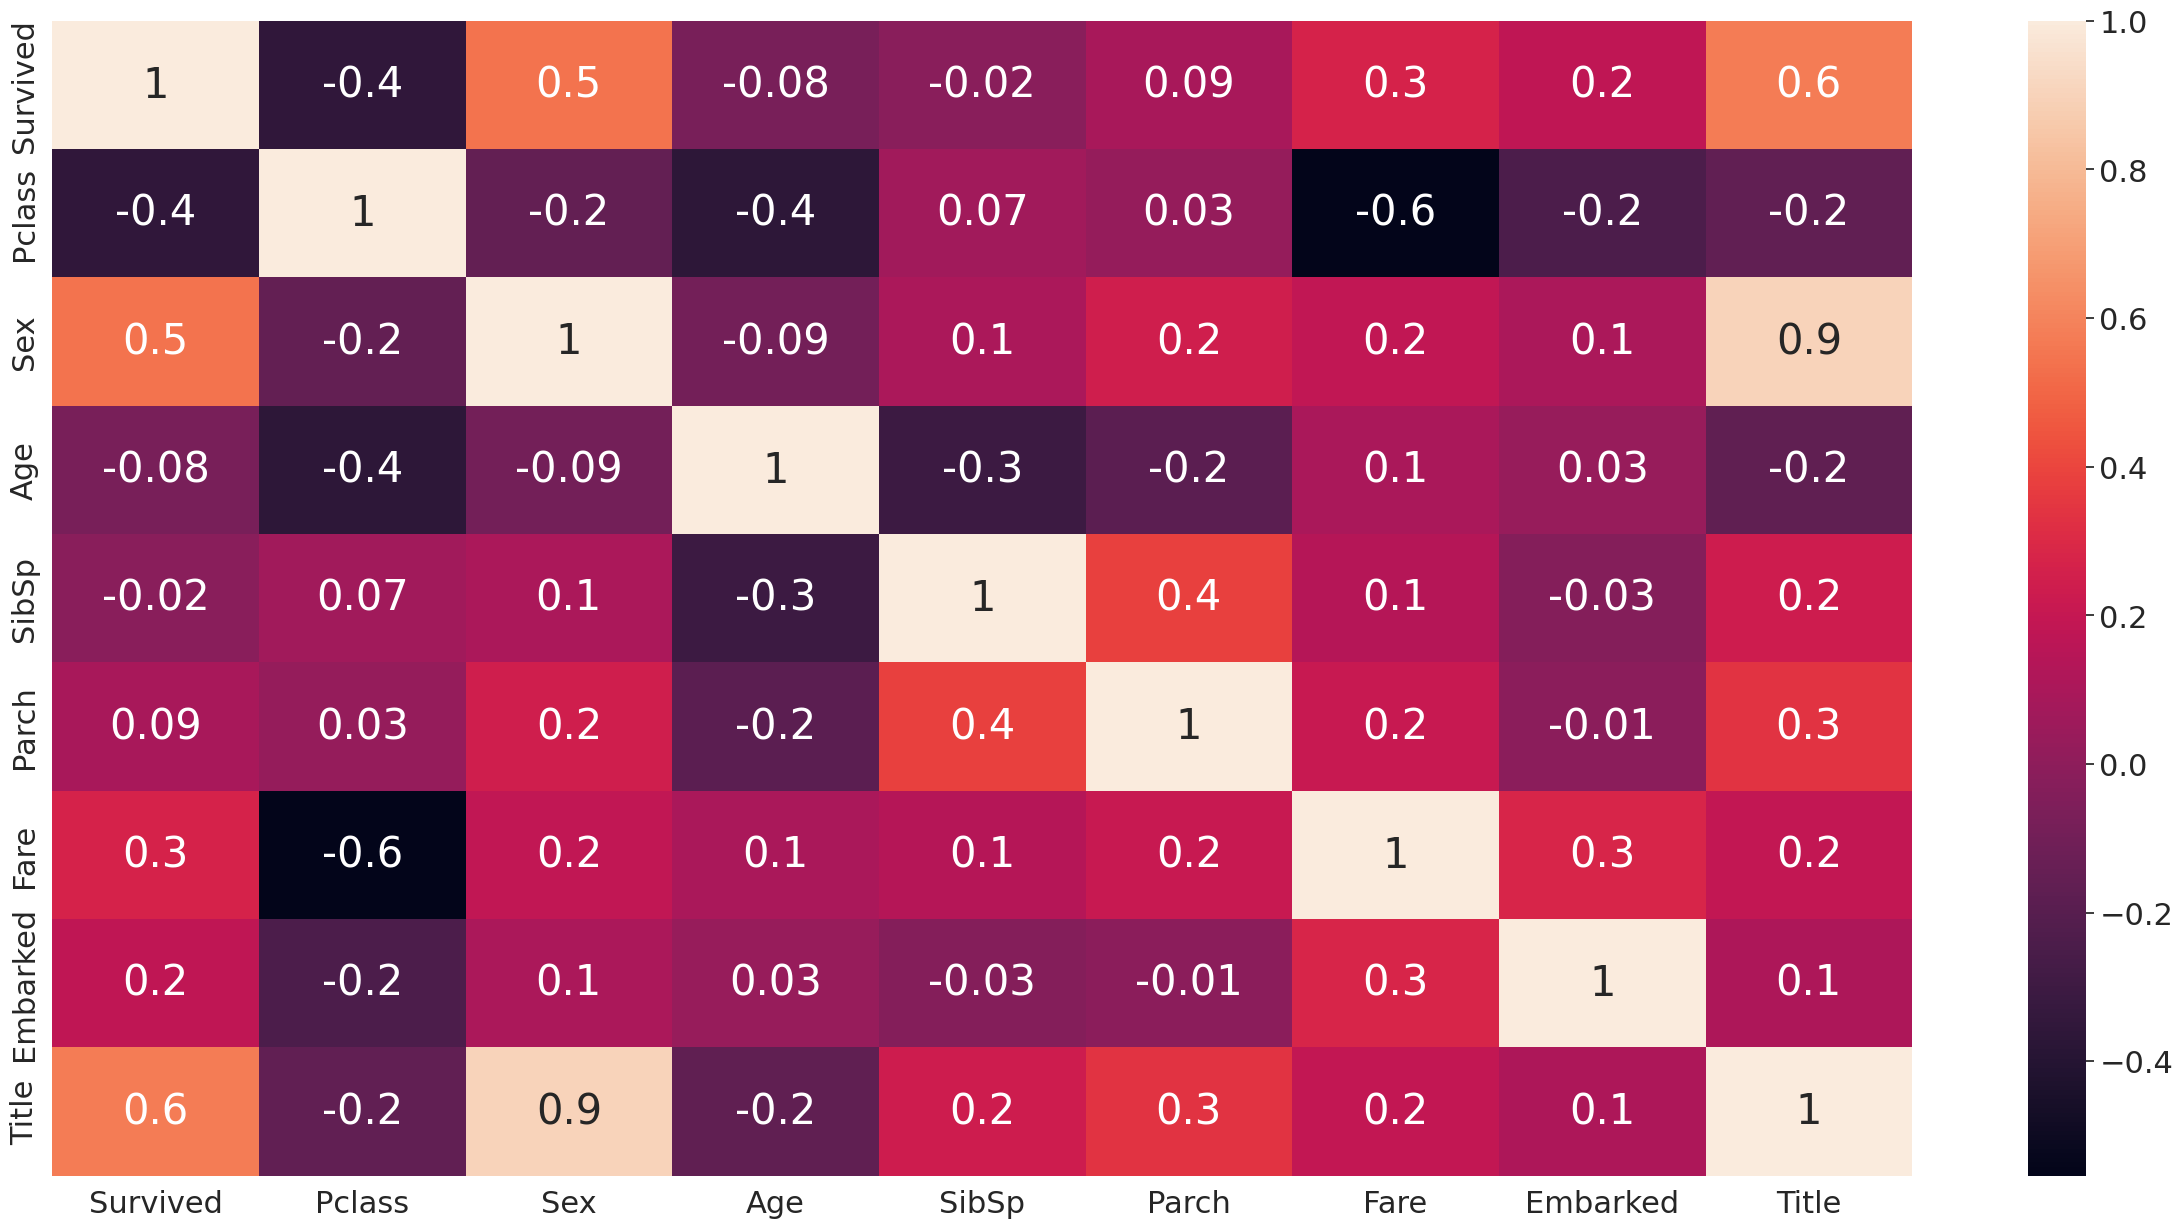

In [655]:
plt.figure(figsize=(30,15))
sns.heatmap(df1.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})
sns.set(font_scale=2)

In [656]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ii = IterativeImputer()
dfi = ii.fit_transform(df)
dfi = pd.DataFrame(dfi,columns=df.columns)

In [657]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iti = IterativeImputer()
df3 = iti.fit_transform(test_data)
df3 = pd.DataFrame(df3,columns=test_data.columns)

In [658]:
dfi

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3.0,0.0,22.000000,1.0,0.0,7.2500,0.0,1.0
1,1.0,1.0,1.0,38.000000,1.0,0.0,71.2833,2.0,6.0
2,1.0,3.0,1.0,26.000000,0.0,0.0,7.9250,0.0,5.0
3,1.0,1.0,1.0,35.000000,1.0,0.0,53.1000,0.0,6.0
4,0.0,3.0,0.0,35.000000,0.0,0.0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,27.000000,0.0,0.0,13.0000,0.0,0.0
887,1.0,1.0,1.0,19.000000,0.0,0.0,30.0000,0.0,5.0
888,0.0,3.0,1.0,23.363125,1.0,2.0,23.4500,0.0,5.0
889,1.0,1.0,0.0,26.000000,0.0,0.0,30.0000,2.0,1.0


In [659]:
dfi['family'] = dfi['SibSp'] + dfi['Parch']+1
dfi = dfi.drop(['SibSp','Parch'],axis=1)
dfi['family'].value_counts()

family
1.0     537
2.0     161
3.0     102
4.0      29
6.0      22
5.0      15
7.0      12
11.0      7
8.0       6
Name: count, dtype: int64

In [660]:
df3['family'] = df3['SibSp'] + df3['Parch']+1
df3 = df3.drop(['SibSp','Parch'],axis=1)
df3['family'].value_counts()

family
1.0     253
2.0      74
3.0      57
4.0      14
5.0       7
7.0       4
11.0      4
6.0       3
8.0       2
Name: count, dtype: int64

In [661]:
dfi.groupby(['family'])['Survived'].mean()

family
1.0     0.303538
2.0     0.552795
3.0     0.578431
4.0     0.724138
5.0     0.200000
6.0     0.136364
7.0     0.333333
8.0     0.000000
11.0    0.000000
Name: Survived, dtype: float64

If the number of family member are higher then the chance of surviving is low

In [662]:
def people(total):
    if total == 1:
        return 'alone'
    elif total > 1 and total<5:
        return 'small'
    else:
        return 'large'

In [663]:
dfi['family'] = dfi['family'].apply(people)
dfi['family'].value_counts()

family
alone    537
small    292
large     62
Name: count, dtype: int64

In [664]:
df3['family'] = df3['family'].apply(people)
df3['family'].value_counts()

family
alone    253
small    145
large     20
Name: count, dtype: int64

In [665]:
dfi.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
family      0
dtype: int64

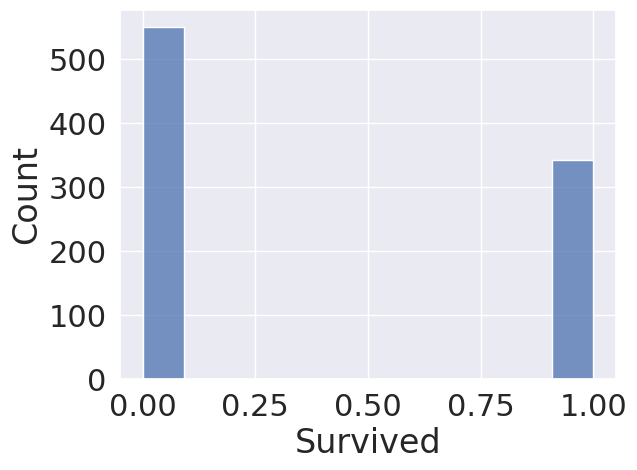

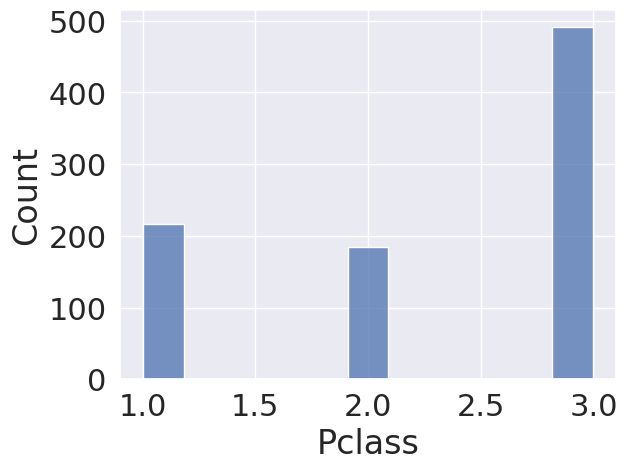

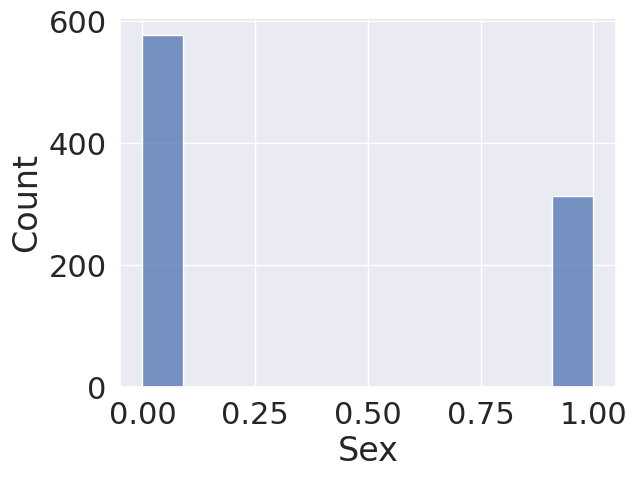

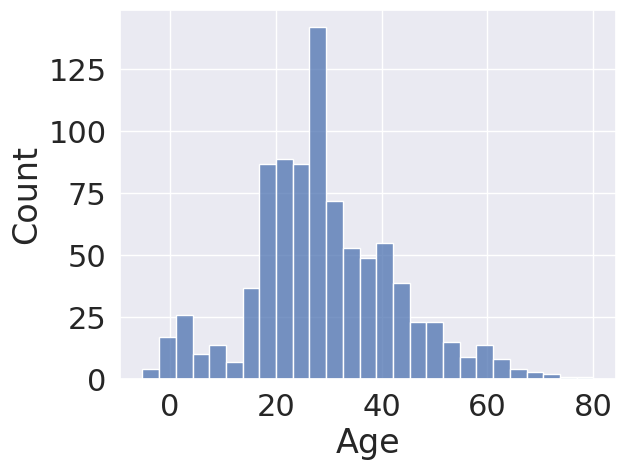

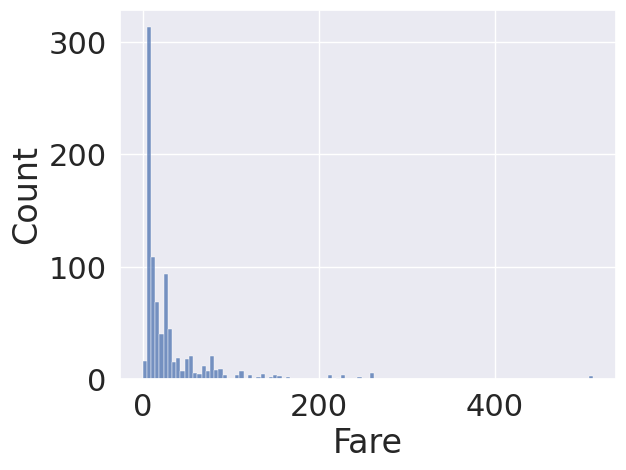

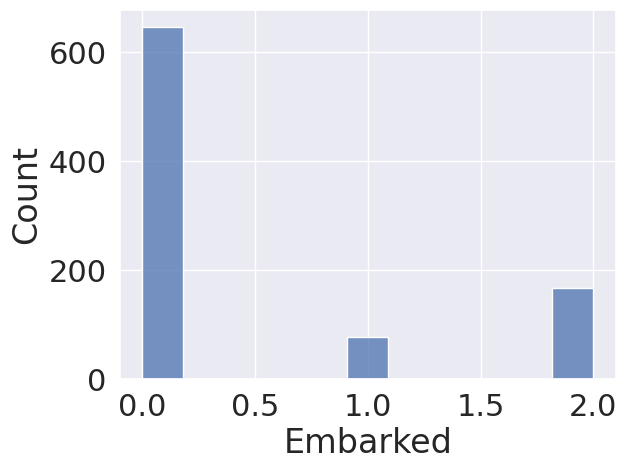

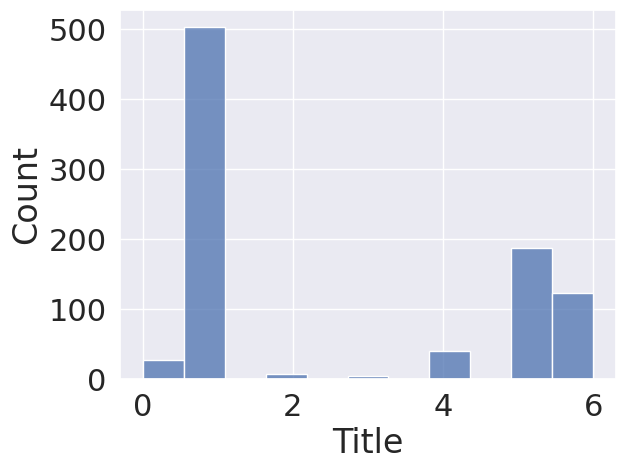

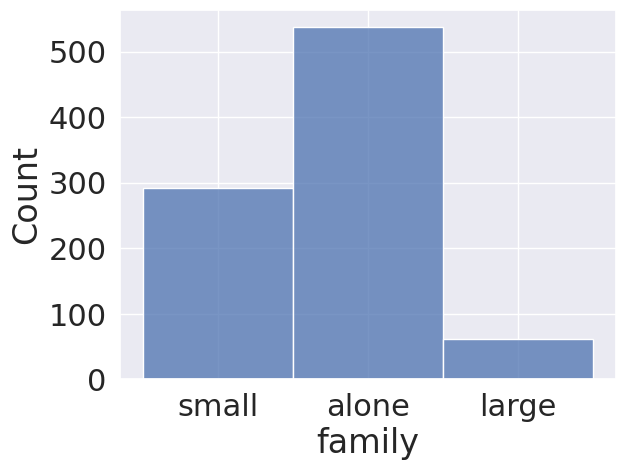

In [666]:
import warnings
warnings.filterwarnings('ignore')

for i in dfi.columns:
    sns.histplot(data=dfi,x=i)
    plt.show()

In [667]:
dfi['family'] = dfi['family'].map({'alone':0,'small':1,'large':2})

In [668]:
df3['family'] = df3['family'].map({'alone':0,'small':1,'large':2})

Survived
0.4777174662568536


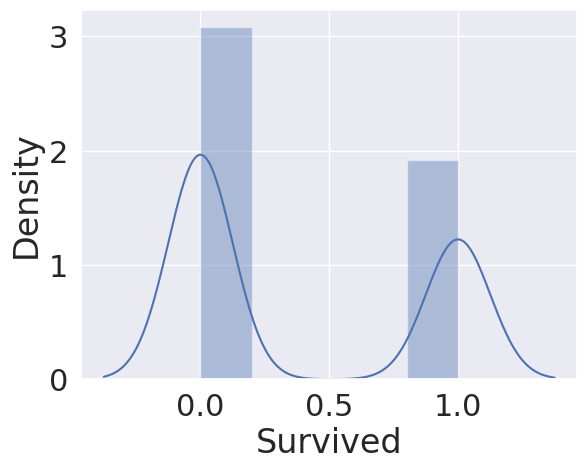

Pclass
-0.6294858816096934


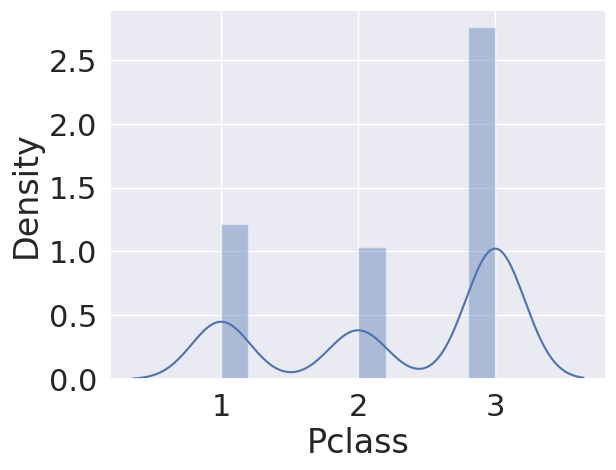

Sex
0.6178784065548291


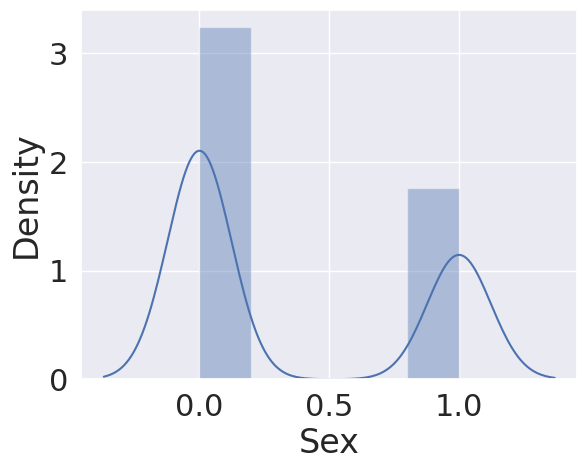

Age
0.3661219144445732


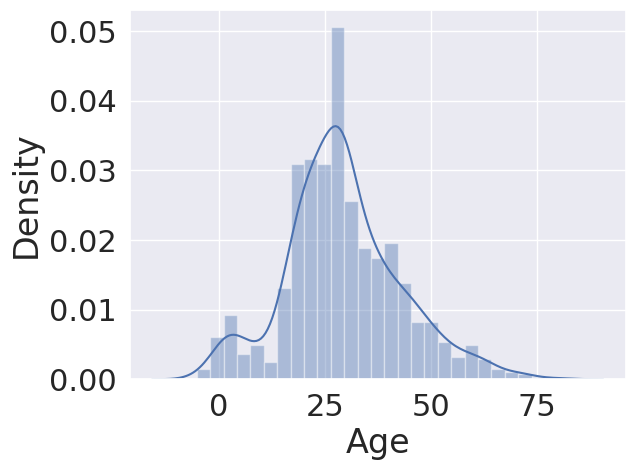

Fare
4.7792532923723545


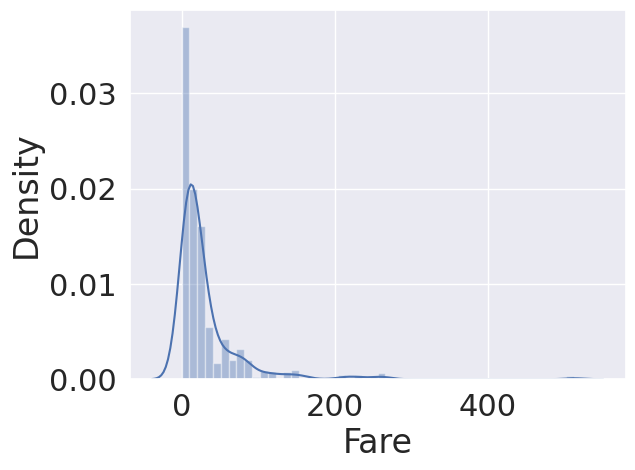

Embarked
1.2626927433430535


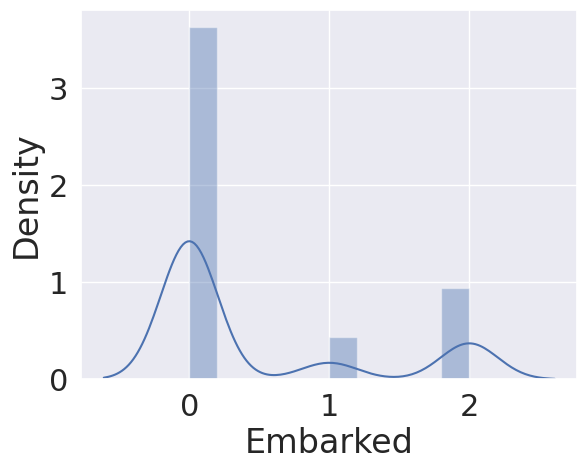

Title
0.5060138240869908


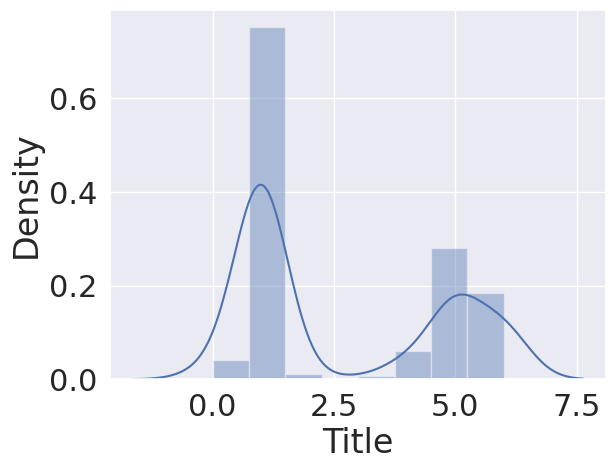

family
0.9888604591188527


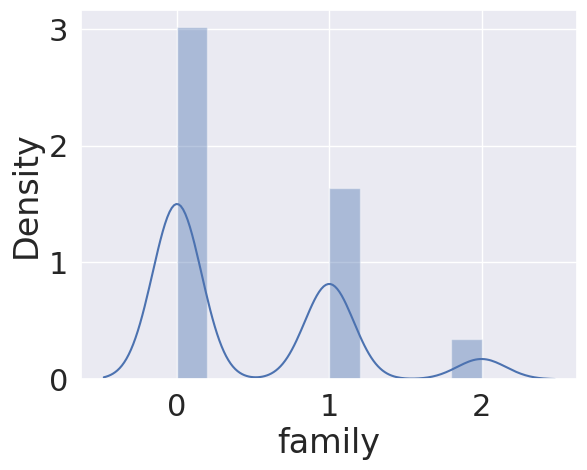

In [669]:
from scipy.stats import skew
for col in dfi:
    print(col)
    print(skew(dfi[col]))
    
    plt.figure()
    sns.distplot(dfi[col])
    plt.show()

<Axes: >

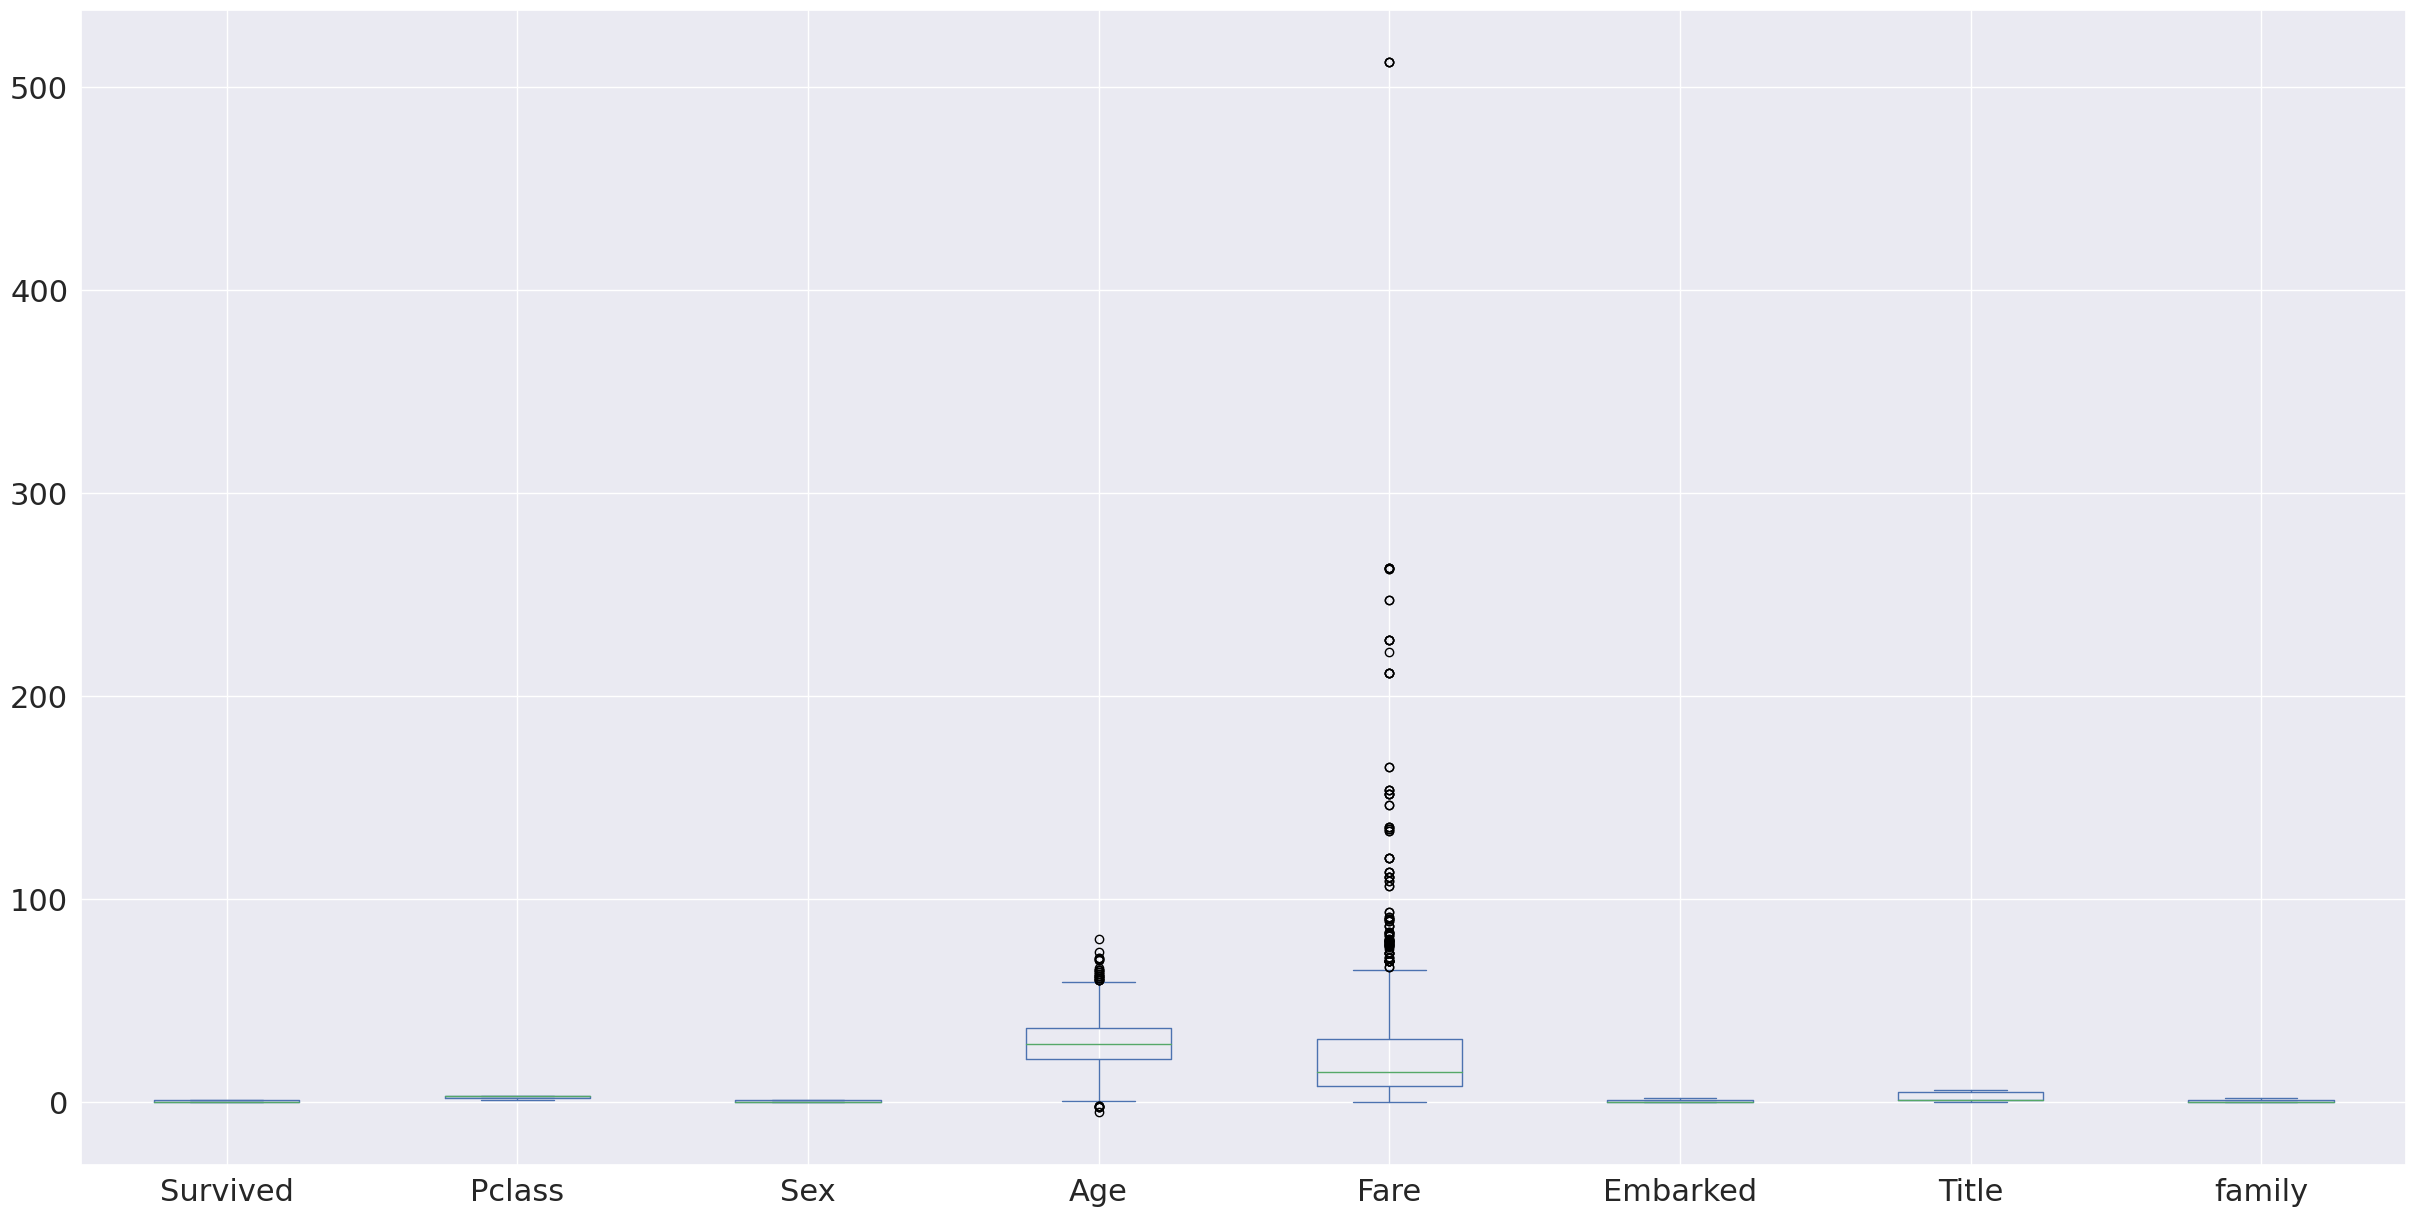

In [670]:
dfi.plot(kind='box',figsize=(30,15))

In [671]:
dfi.groupby(['Age'])['Survived'].mean().sort_values(ascending=False).head(50)

Age
80.000000    1.0
22.430146    1.0
23.826746    1.0
23.822404    1.0
23.199970    1.0
23.193708    1.0
22.567049    1.0
22.430200    1.0
22.429985    1.0
53.000000    1.0
22.429502    1.0
22.428966    1.0
22.428323    1.0
63.000000    1.0
20.721498    1.0
20.721444    1.0
36.372420    1.0
25.965486    1.0
18.693130    1.0
31.570825    1.0
35.418158    1.0
33.399411    1.0
33.397642    1.0
32.347242    1.0
31.742786    1.0
31.653590    1.0
30.914945    1.0
39.207806    1.0
30.549808    1.0
37.900564    1.0
30.182104    1.0
39.092668    1.0
39.156991    1.0
39.163423    1.0
19.279249    1.0
36.092444    1.0
18.581851    1.0
17.347759    1.0
12.000000    1.0
13.000000    1.0
0.920000     1.0
0.750000     1.0
14.956275    1.0
14.957339    1.0
0.830000     1.0
0.670000     1.0
15.719999    1.0
0.420000     1.0
17.611249    1.0
5.000000     1.0
Name: Survived, dtype: float64

In [672]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [673]:
iqr = dfi['Fare'].quantile(0.75)-dfi['Fare'].quantile(0.25)
low = dfi['Fare'].quantile(0.25)-(iqr*3)
up = dfi['Fare'].quantile(0.75)+(iqr*3)
print(low,up)

-61.358399999999996 100.2688


In [674]:
dfi=dfi[dfi['Fare']<100]

In [675]:
iqr = df3['Fare'].quantile(0.75)-df3['Fare'].quantile(0.25)
low = df3['Fare'].quantile(0.25)-(iqr*3)
up = df3['Fare'].quantile(0.75)+(iqr*3)
print(low,up)

-62.83242499999999 102.20009999999999


In [676]:
df3.loc[df3['Fare']>=100]=100

In [677]:
dfi.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,family
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,0.361575,2.391408,0.334129,29.072241,22.411942,0.423628,2.565632,0.445107
std,0.480744,0.792451,0.471967,13.627759,20.827218,0.759340,2.115509,0.617327
min,0.000000,1.000000,0.000000,-5.171931,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,7.895800,0.000000,1.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,13.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,36.000000,27.720800,1.000000,5.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,93.500000,2.000000,6.000000,2.000000


In [678]:
dfi.skew()

Survived    0.577256
Pclass     -0.816887
Sex         0.704575
Age         0.388524
Fare        1.672004
Embarked    1.400325
Title       0.589201
family      1.064776
dtype: float64

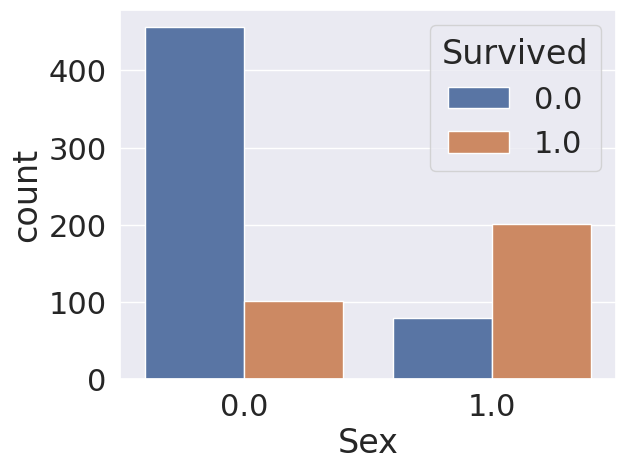

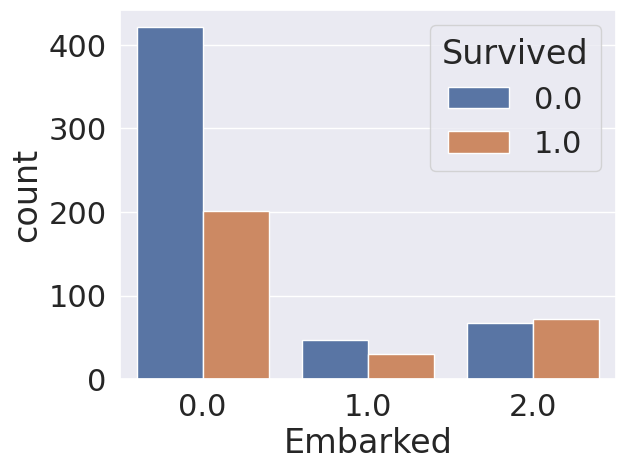

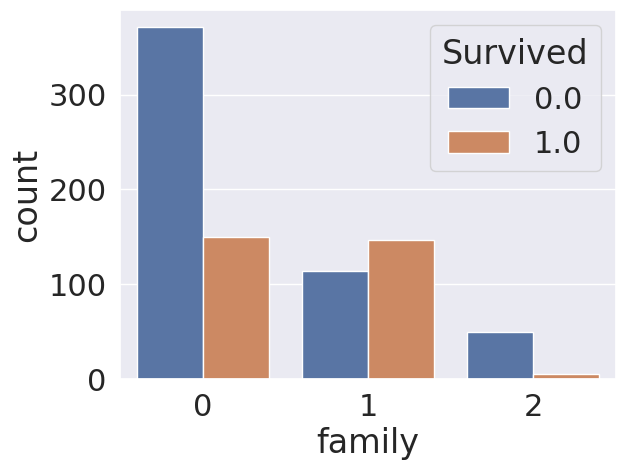

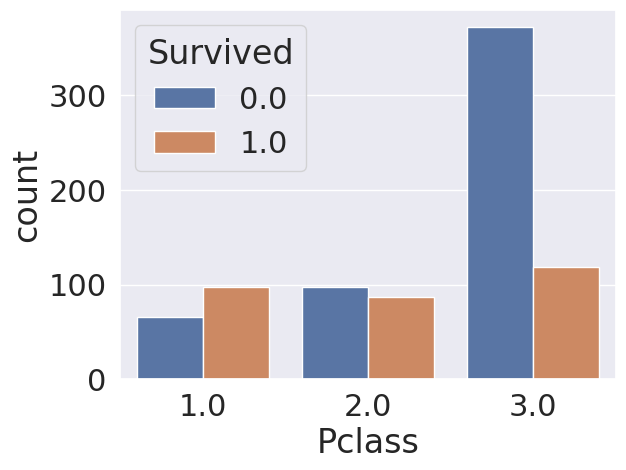

In [679]:
for i in ['Sex','Embarked','family','Pclass']:
    sns.countplot(data=dfi, x=i, hue='Survived')
    plt.show()

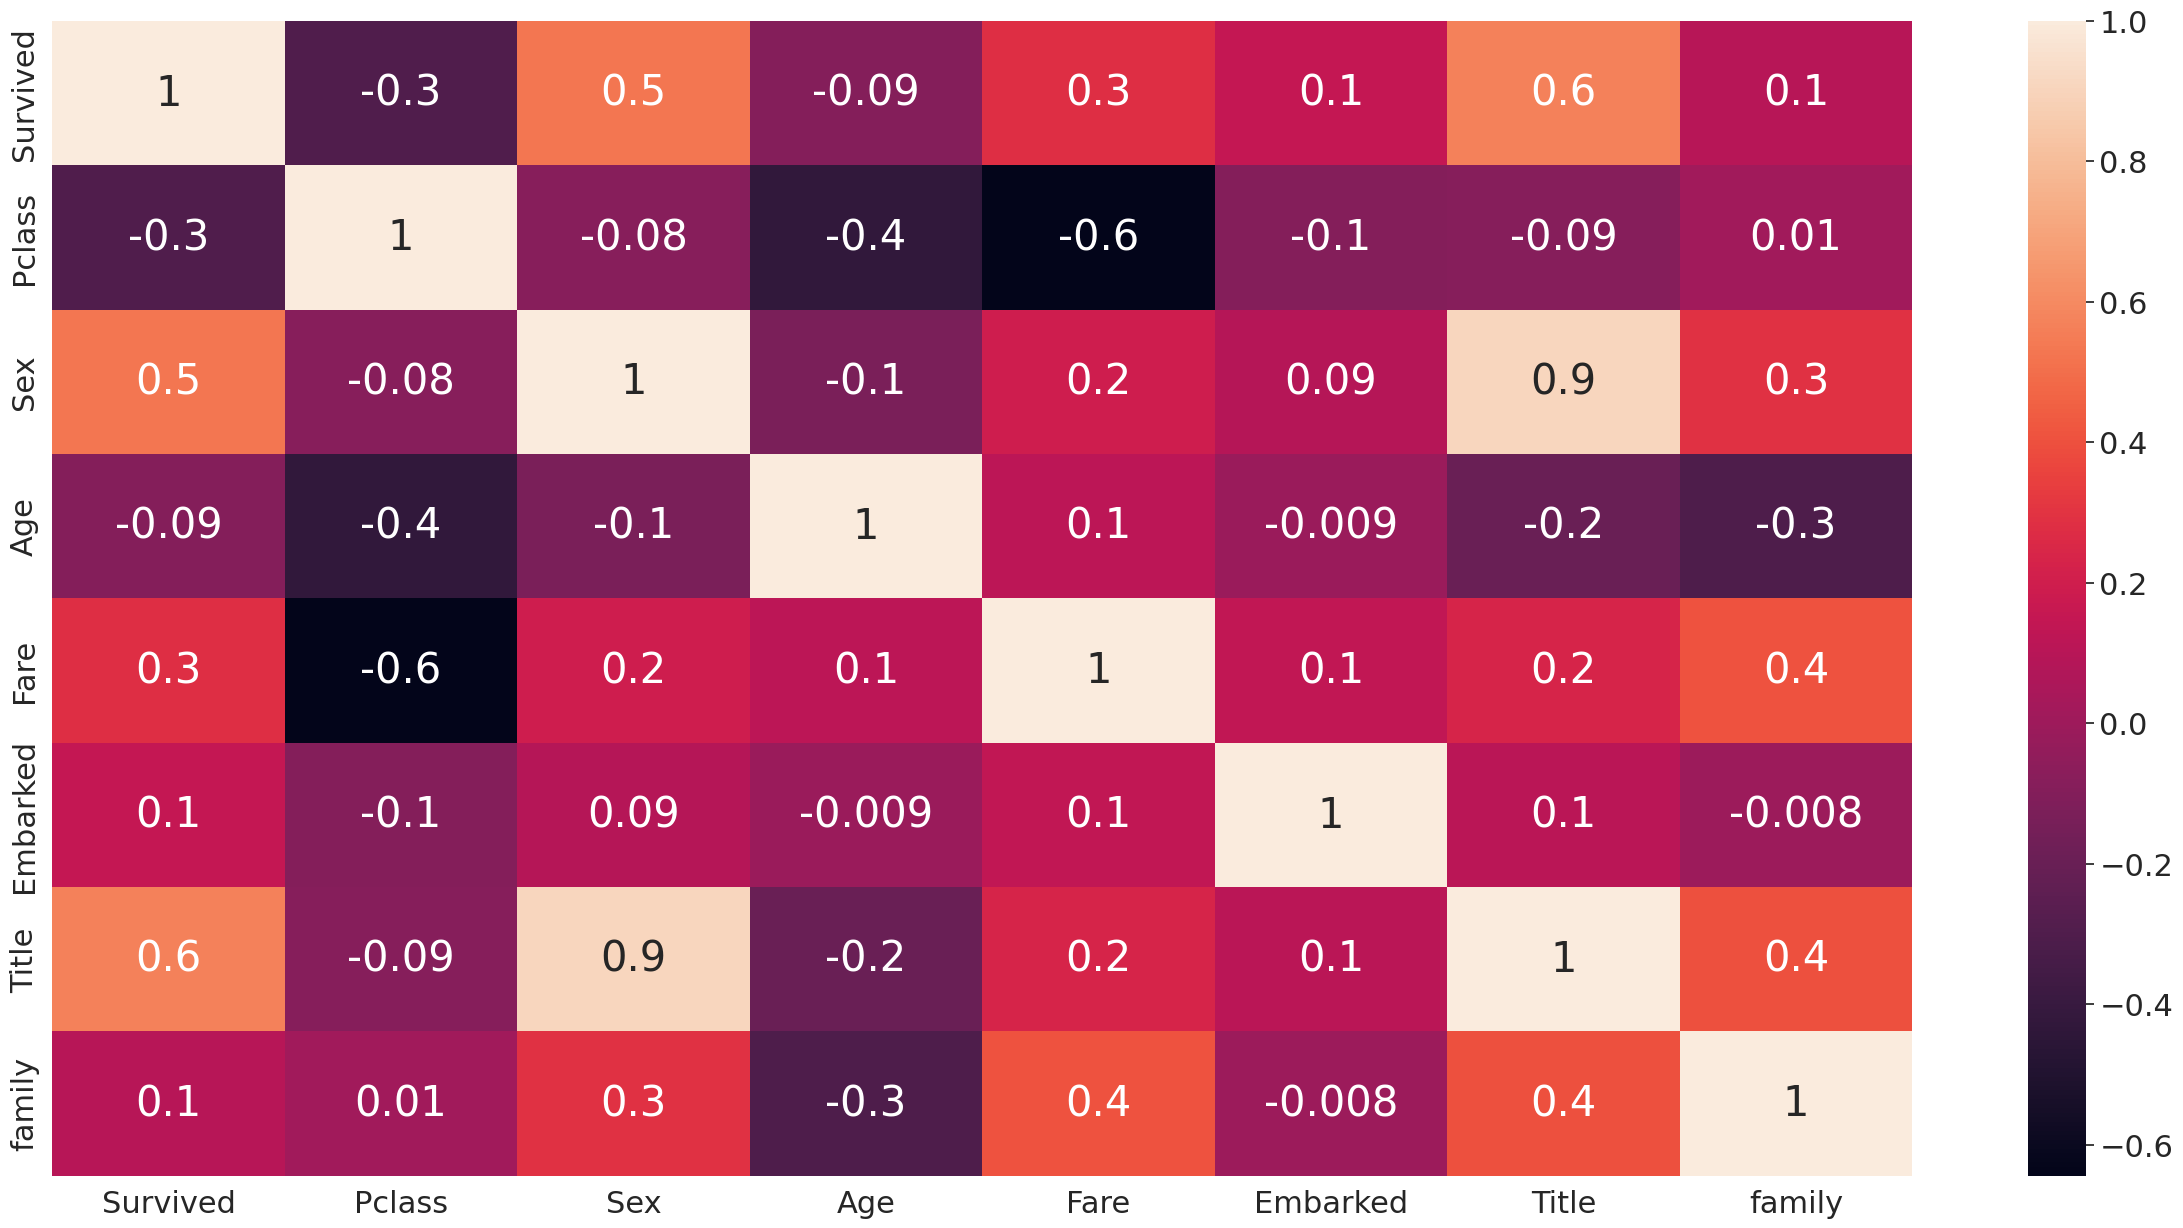

In [680]:
plt.figure(figsize=(30,15))
sns.heatmap(dfi.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})
sns.set(font_scale=2)

<Axes: ylabel='count'>

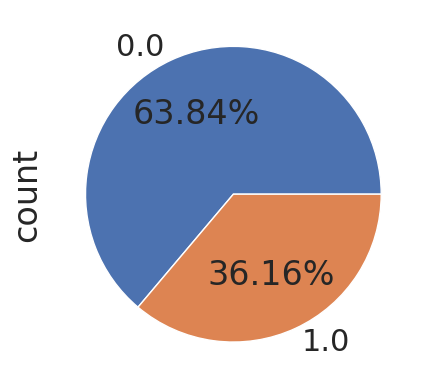

In [681]:
dfi['Survived'].value_counts().plot.pie(autopct='%.2f%%')

In [682]:
x= dfi.drop('Survived',axis=1)
y= dfi['Survived']

In [683]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.20)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

In [684]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier , VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [685]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testing : ',lr.score(x_test_sca,y_test))

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())
print(confusion_matrix(y_test,lry_pred))

Training  :  0.8298507462686567
Testing :  0.8333333333333334
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       113
         1.0       0.75      0.73      0.74        55

    accuracy                           0.83       168
   macro avg       0.81      0.81      0.81       168
weighted avg       0.83      0.83      0.83       168

[0.85714286 0.78571429 0.81428571 0.77142857 0.91428571 0.84285714
 0.81428571 0.81428571 0.85714286 0.82857143 0.75362319 0.85507246]
0.8257246376811592
difference 0.007608695652174147
[[100  13]
 [ 15  40]]


In [686]:
knn =KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testing : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())
print(confusion_matrix(y_test,knny_pred))

Training  :  0.8552238805970149
Testing :  0.8452380952380952
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       113
         1.0       0.85      0.64      0.73        55

    accuracy                           0.85       168
   macro avg       0.85      0.79      0.81       168
weighted avg       0.85      0.85      0.84       168

[0.625      0.80357143 0.73214286 0.75       0.75       0.875
 0.83928571 0.75       0.83928571 0.75       0.73214286 0.80357143
 0.73214286 0.8        0.76363636]
0.7697186147186148
difference 0.07551948051948043
[[107   6]
 [ 20  35]]


In [687]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print('Training  : ',gs.score(x_train_sca,y_train))
print('Testing : ',gs.score(x_test_sca,y_test))

print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())
print(confusion_matrix(y_test,gsy_pred))

Training  :  0.7776119402985074
Testing :  0.7857142857142857
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       113
         1.0       0.67      0.69      0.68        55

    accuracy                           0.79       168
   macro avg       0.76      0.76      0.76       168
weighted avg       0.79      0.79      0.79       168

[0.74404762 0.7797619  0.80357143 0.79041916 0.77245509]
0.7780510407755917
difference 0.007663244938693969
[[94 19]
 [17 38]]


In [688]:
rfc= RandomForestClassifier(n_estimators=200,max_depth=4)
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testing : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  0.8477611940298507
Testing :  0.8452380952380952
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       113
         1.0       0.81      0.69      0.75        55

    accuracy                           0.85       168
   macro avg       0.83      0.81      0.82       168
weighted avg       0.84      0.85      0.84       168

[0.85714286 0.84285714 0.84285714 0.75714286 0.9        0.84285714
 0.8        0.84285714 0.82857143 0.81428571 0.85507246 0.86956522]
0.8377674258109039
difference 0.007470669427191323
[[104   9]
 [ 17  38]]


from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

rfc_param = {'max_depth':[5,10],
            'max_features':[5,7,'auto'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,8],
            'n_estimators':[200,300]}
clf = GridSearchCV(rfc, rfc_param,cv=5)
clf.fit(x_train_sca,y_train)

print(clf.best_score_)
print(clf.best_params_)

In [689]:
rfc= RandomForestClassifier(n_estimators=300, criterion= 'gini',max_depth= 15, max_features= 'auto', min_samples_split= 16)
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testing : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=20)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  0.8940298507462686
Testing :  0.8511904761904762
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       113
         1.0       0.86      0.65      0.74        55

    accuracy                           0.85       168
   macro avg       0.85      0.80      0.82       168
weighted avg       0.85      0.85      0.85       168

[0.78571429 0.92857143 0.78571429 0.92857143 0.71428571 0.76190476
 0.88095238 0.9047619  0.92857143 0.88095238 0.85714286 0.88095238
 0.92857143 0.85714286 0.83333333 0.76190476 0.88095238 0.85714286
 0.87804878 0.82926829]
0.8532229965156795
difference -0.002032520325203291
[[107   6]
 [ 19  36]]


In [690]:
abc =AdaBoostClassifier(learning_rate=.8)
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testing : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())
print(confusion_matrix(y_test,abcy_pred))

Training  :  0.8567164179104477
Testing :  0.8511904761904762
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       113
         1.0       0.81      0.71      0.76        55

    accuracy                           0.85       168
   macro avg       0.84      0.81      0.82       168
weighted avg       0.85      0.85      0.85       168

[0.78571429 0.85714286 0.875      0.82142857 0.73214286 0.91071429
 0.85714286 0.83928571 0.82142857 0.83928571 0.83928571 0.85714286
 0.80357143 0.87272727 0.85454545]
0.8377705627705628
difference 0.013419913419913332
[[104   9]
 [ 16  39]]


In [691]:
gbcbest = GradientBoostingClassifier(learning_rate=0.01)
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testing : ',gbcbest.score(x_test_sca,y_test))

print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=15)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())
print(confusion_matrix(y_test,gbcy_pred))

Training  :  0.8656716417910447
Testing :  0.8452380952380952
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       113
         1.0       0.82      0.67      0.74        55

    accuracy                           0.85       168
   macro avg       0.84      0.80      0.81       168
weighted avg       0.84      0.85      0.84       168

[0.82142857 0.85714286 0.91071429 0.78571429 0.71428571 0.89285714
 0.83928571 0.82142857 0.82142857 0.875      0.82142857 0.78571429
 0.83928571 0.83636364 0.85454545]
0.8317748917748917
difference 0.01346320346320351
[[105   8]
 [ 18  37]]


In [692]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testing : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y,cv=20)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())
print(confusion_matrix(y_test,dtcy_pred))

Training  :  0.9925373134328358
Testing :  0.7916666666666666
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       113
         1.0       0.69      0.67      0.68        55

    accuracy                           0.79       168
   macro avg       0.76      0.76      0.76       168
weighted avg       0.79      0.79      0.79       168

[0.69047619 0.76190476 0.83333333 0.73809524 0.71428571 0.71428571
 0.80952381 0.80952381 0.9047619  0.78571429 0.92857143 0.78571429
 0.83333333 0.83333333 0.88095238 0.76190476 0.9047619  0.66666667
 0.82926829 0.85365854]
0.8020034843205576
difference -0.01033681765389094
[[96 17]
 [18 37]]


In [694]:
'''dtc_param = {'max_depth':[5,10,15,20],
            'max_features':[5,7,8,'auto'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,8,16,24]
            }
clf = GridSearchCV(dtc, dtc_param,cv=5)
clf.fit(x_train_sca,y_train)

print(clf.best_score_)
print(clf.best_params_)'''

"dtc_param = {'max_depth':[5,10,15,20],\n            'max_features':[5,7,8,'auto'],\n            'criterion':['gini','entropy'],\n            'min_samples_split':[4,8,16,24]\n            }\nclf = GridSearchCV(dtc, dtc_param,cv=5)\nclf.fit(x_train_sca,y_train)\n\nprint(clf.best_score_)\nprint(clf.best_params_)"

In [695]:
dtc= DecisionTreeClassifier(min_samples_split= 4, max_features=5, max_depth= 5, criterion= 'entropy')
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testing : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y,cv=11)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())
print(confusion_matrix(y_test,dtcy_pred))

Training  :  0.8641791044776119
Testing :  0.8392857142857143
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       113
         1.0       0.82      0.65      0.73        55

    accuracy                           0.84       168
   macro avg       0.83      0.79      0.81       168
weighted avg       0.84      0.84      0.83       168

[0.84415584 0.83116883 0.81578947 0.80263158 0.88157895 0.82894737
 0.85526316 0.86842105 0.80263158 0.85526316 0.84210526]
0.8389051140247313
difference 0.0003806002609829662
[[105   8]
 [ 19  36]]


.

.

In [696]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Sex       418 non-null    float64
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    float64
 5   Title     418 non-null    float64
 6   family    418 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 23.0 KB


In [697]:
df3.duplicated().sum()

65

In [698]:
df3.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
family      0
dtype: int64

<Axes: >

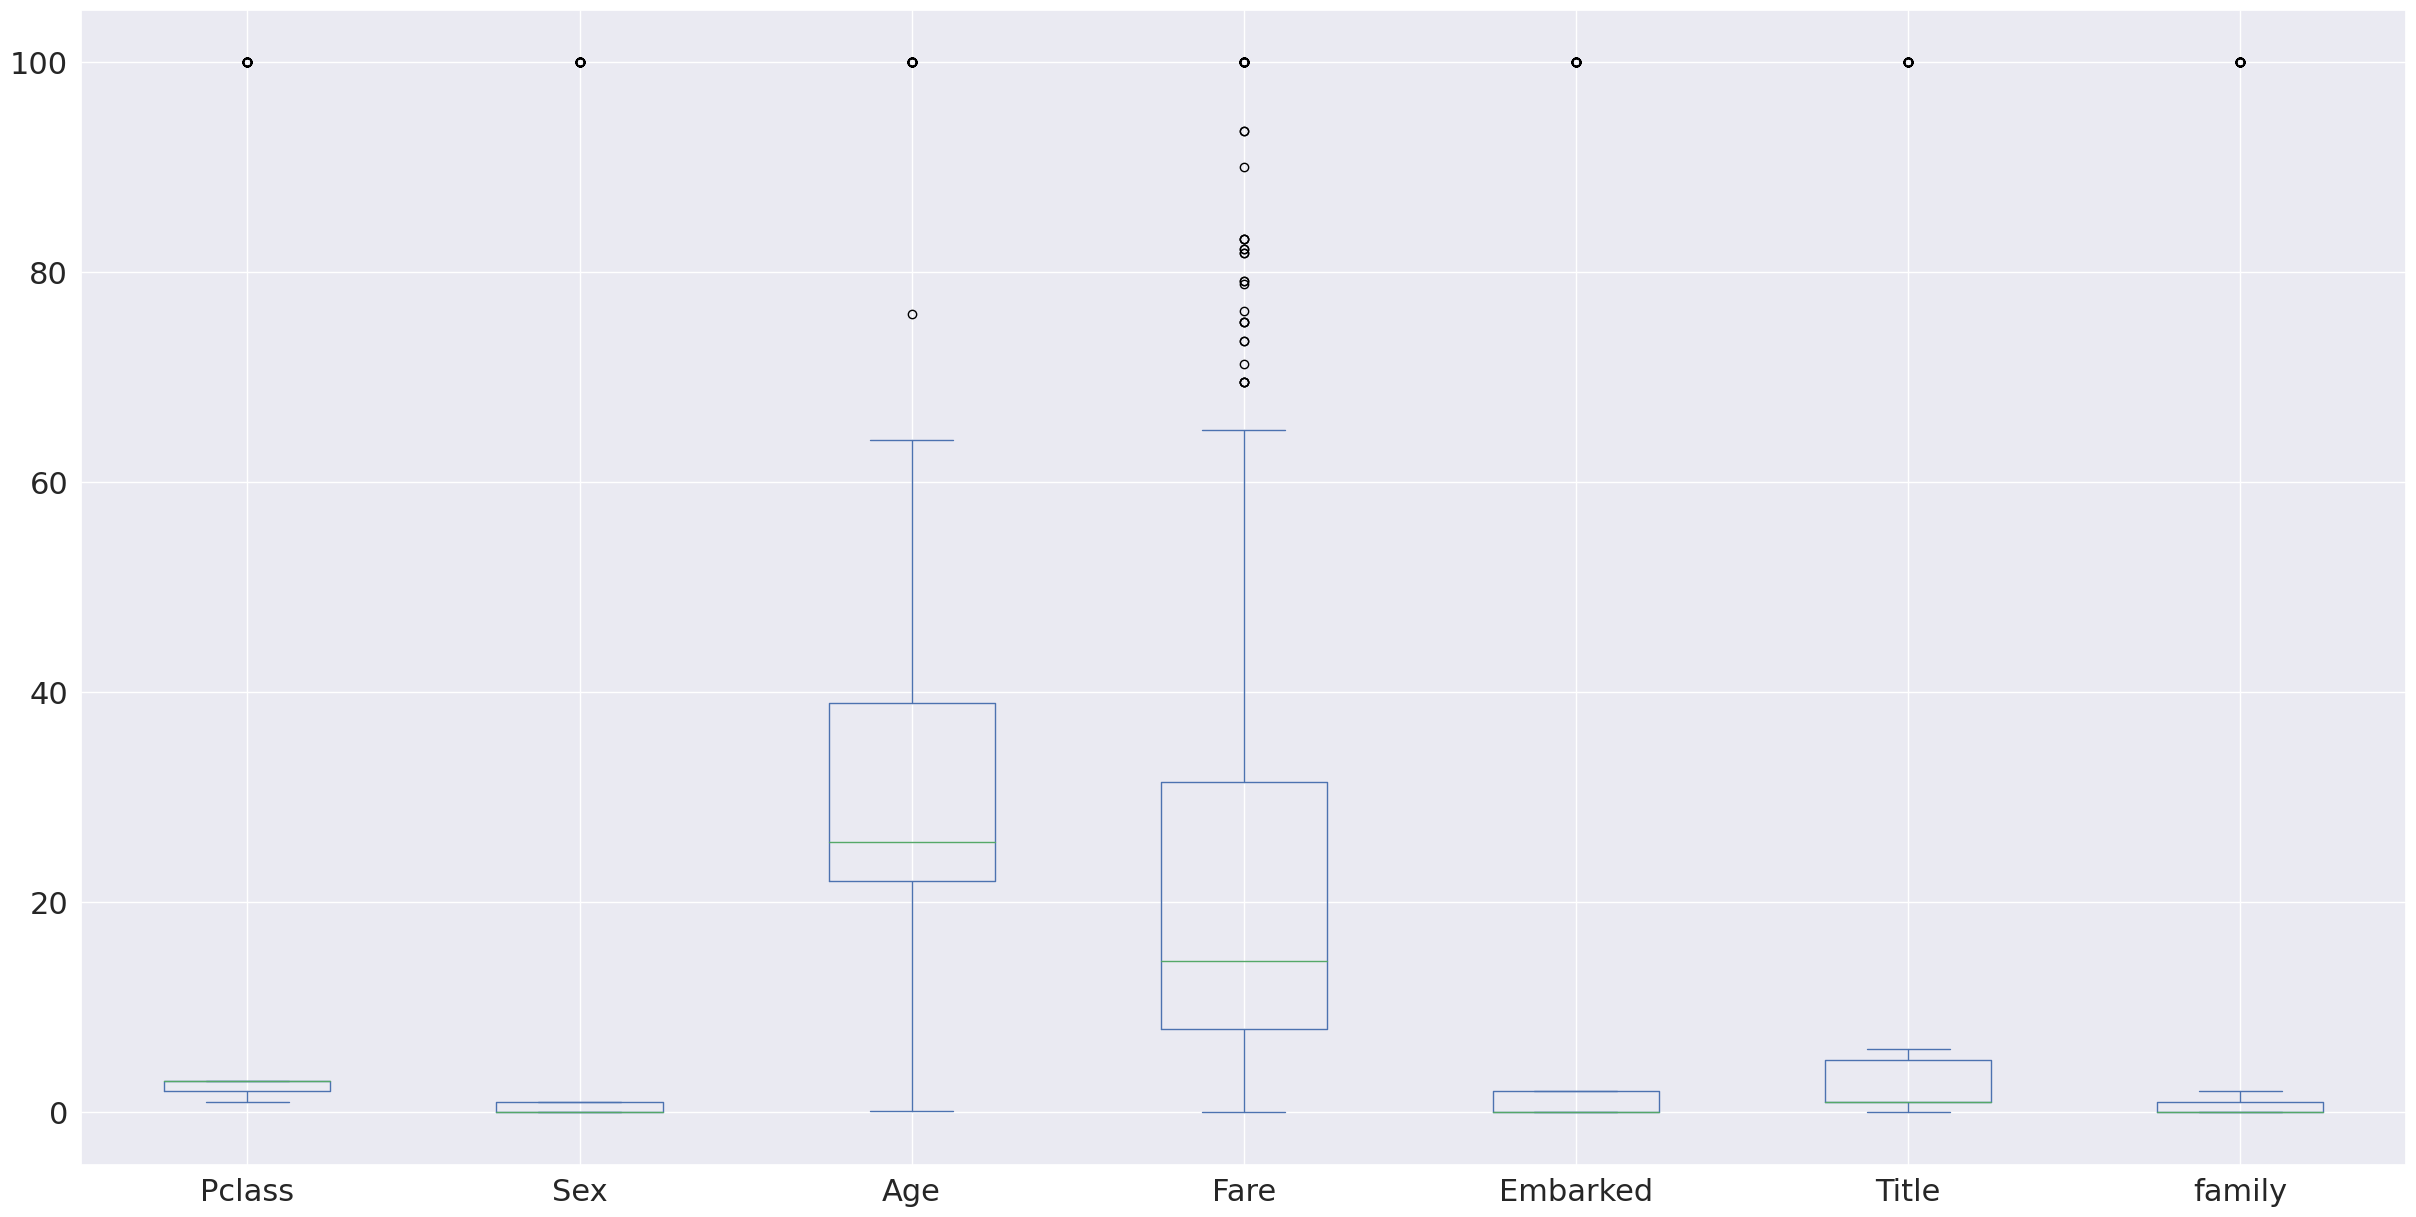

In [699]:
df3.plot(kind='box',figsize=(30,15))

In [711]:
predicting_test = dtc.predict(df3)

In [712]:
sample = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [713]:
test = pd.DataFrame(predicting_test)
test.value_counts()

1.0    372
0.0     46
Name: count, dtype: int64

In [714]:
submission = pd.DataFrame({'PassengerId':sample['PassengerId'],'Survived':predicting_test})

In [715]:
filename = 'Titanic_ML2.csv'
submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic_ML2.csv
